In [2]:
import pandas as pd
df = pd.read_excel("loan_portfolio_dataset.xlsx")
df.head()


,customer_id,customer_name,branch,loan_amount,interest_rate,days_past_due,loan_type
0,1001,Amit,Mumbai,500000,10.5,0,Home
1,1002,Rohan,Delhi,300000,11.2,12,Auto
2,1003,Sneha,Chennai,450000,10.8,0,Personal
3,1004,Priya,Kolkata,200000,12.0,5,Gold
4,1005,Anil,Mumbai,600000,9.9,0,Home


In [3]:
total_loan = df["loan_amount"].sum()
avg_loan = df["loan_amount"].mean()
avg_interest = df["interest_rate"].mean()
customer_count = df["customer_id"].nunique()

print("Total Loan Portfolio Value:", total_loan)
print("Average Loan Size:", round(avg_loan, 2))
print("Average Interest Rate:", round(avg_interest, 2))
print("Total Customers:", customer_count)


Total Loan Portfolio Value: 3900000
Average Loan Size: 390000.0
Average Interest Rate: 10.69
Total Customers: 10


In [4]:
# Number of overdue customers
overdue_customers = df[df["days_past_due"] > 0].shape[0]

# Total overdue loan amount
overdue_amount = df[df["days_past_due"] > 0]["loan_amount"].sum()

# Assign risk buckets
def risk_bucket(dpd):
    if dpd == 0:
        return "On Time"
    elif dpd <= 10:
        return "Mild Overdue"
    elif dpd <= 30:
        return "High Overdue"
    else:
        return "Severe Overdue"

df["risk_bucket"] = df["days_past_due"].apply(risk_bucket)

print("Overdue Customers:", overdue_customers)
print("Overdue Loan Amount:", overdue_amount)
print("\nRisk Bucket Counts:\n", df["risk_bucket"].value_counts())


Overdue Customers: 5
Overdue Loan Amount: 1600000

Risk Bucket Counts:
 risk_bucket
On Time         5
High Overdue    3
Mild Overdue    2
Name: count, dtype: int64


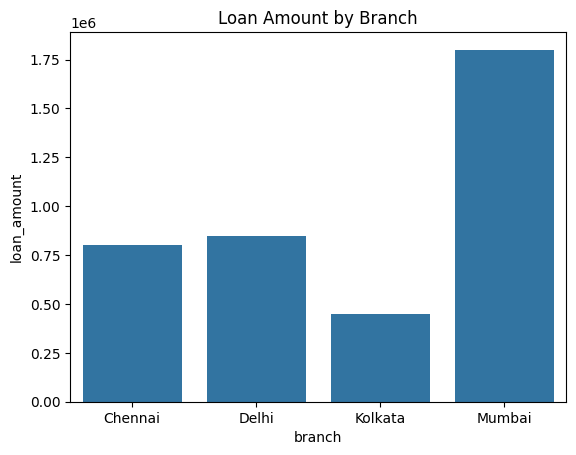

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

branch_summary = df.groupby("branch")["loan_amount"].sum().reset_index()

sns.barplot(data=branch_summary, x="branch", y="loan_amount")
plt.title("Loan Amount by Branch")
plt.show()


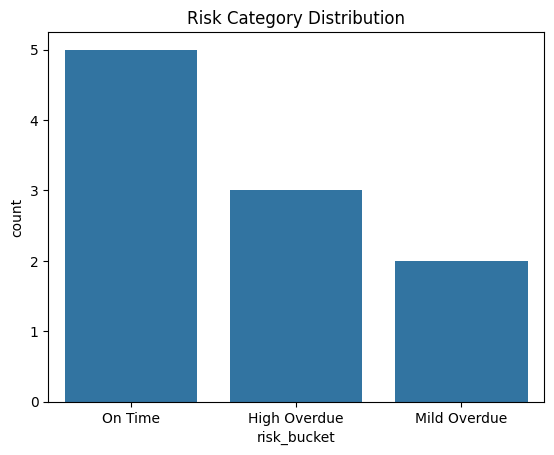

In [6]:
sns.countplot(data=df, x="risk_bucket")
plt.title("Risk Category Distribution")
plt.show()


In [7]:
# KPI summary table
kpi_summary = pd.DataFrame({
    "Total Loan Portfolio": [total_loan],
    "Average Loan Size": [avg_loan],
    "Average Interest Rate": [avg_interest],
    "Total Customers": [customer_count],
    "Overdue Customers": [overdue_customers],
    "Overdue Amount": [overdue_amount]
})

# Branch performance table
branch_summary = df.groupby("branch")["loan_amount"].sum().reset_index()

# Risk bucket table
risk_summary = df["risk_bucket"].value_counts().reset_index()
risk_summary.columns = ["risk_bucket", "count"]


In [8]:
with pd.ExcelWriter("loan_analysis_output.xlsx") as writer:
    kpi_summary.to_excel(writer, sheet_name="KPI Summary", index=False)
    branch_summary.to_excel(writer, sheet_name="Branch Performance", index=False)
    risk_summary.to_excel(writer, sheet_name="Risk Segmentation", index=False)
    df.to_excel(writer, sheet_name="Raw Data", index=False)
